https://github.com/srush/GPU-Puzzles?tab=readme-ov-file

In [1]:
import numba
import numpy as np
import warnings
from lib import CudaProblem, Coord

warnings.filterwarnings(
    action="ignore", category=numba.NumbaPerformanceWarning, module="numba"
)

In [2]:
import os

os.environ['NUMBA_CUDA_DRIVER'] = '/opt/maca/tools/cu-bridge/lib/libcuda.so'

# Puzzle 1: Map
对数组每个元素增加10；每个线程处理一个元素

# Map
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 



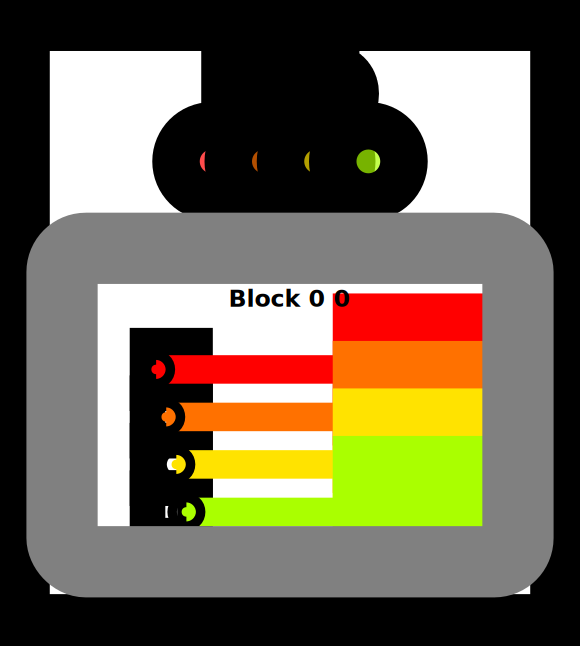

In [3]:
def map_spec(a):
    return a + 10


def map_test(cuda):
    def call(out, a) -> None:
        local_i = cuda.threadIdx.x
        # FILL ME IN (roughly 1 lines)
        out[local_i] = map_spec(a[local_i])

    return call


SIZE = 4
out = np.zeros((SIZE,))
a = np.arange(SIZE)
problem = CudaProblem(
    "Map", map_test, [a], out, threadsperblock=Coord(SIZE, 1), spec=map_spec
)

problem.show()

In [4]:
problem.check()

CudaAPIError: [801] Call to cuCtxPushCurrent results in CUDA_ERROR_NOT_SUPPORTED